In [25]:
import pandas as pd
import tensorflow as tf
from skimage import io 
import PIL
import PIL.Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

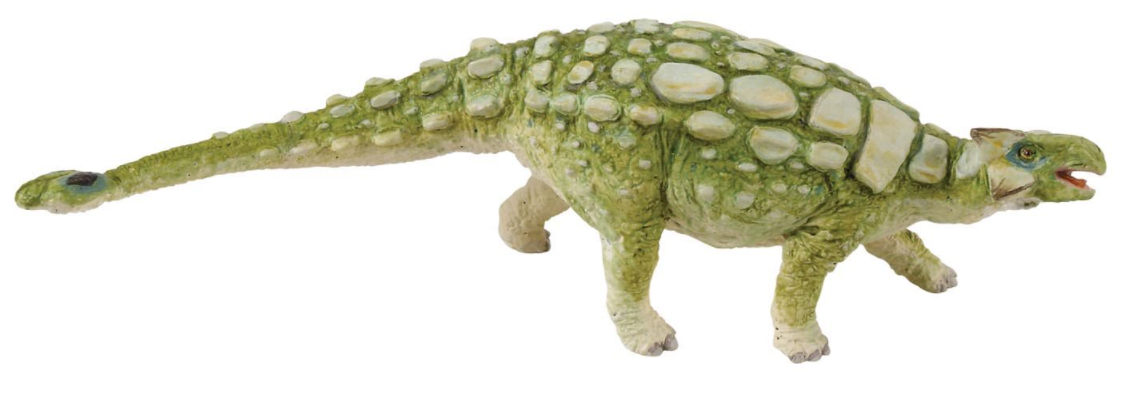

In [17]:
PIL.Image.open('data/ankylosaurus/1.png')

In [18]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(300, 500))

val_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(300, 500))


Found 200 files belonging to 5 classes.
Using 160 files for training.
Found 200 files belonging to 5 classes.
Using 40 files for validation.


In [19]:
for element in train_ds:
  print(element)


(<tf.Tensor: shape=(32, 300, 500, 3), dtype=float32, numpy=
array([[[[253.       , 253.       , 252.       ],
         [253.       , 253.       , 252.829    ],
         [253.       , 253.       , 253.       ],
         ...,
         [253.       , 253.       , 251.715    ],
         [253.       , 253.       , 251.       ],
         [253.       , 253.       , 251.       ]],

        [[253.       , 253.71     , 250.58     ],
         [253.       , 253.12141  , 251.409    ],
         [253.       , 253.       , 252.08765  ],
         ...,
         [253.       , 253.       , 252.62735  ],
         [253.       , 253.       , 252.42     ],
         [253.       , 253.       , 252.42     ]],

        [[253.       , 254.       , 250.       ],
         [253.       , 253.59932  , 250.40068  ],
         [253.       , 253.14725  , 251.19833  ],
         ...,
         [253.       , 253.       , 253.       ],
         [253.       , 253.       , 253.       ],
         [253.       , 253.       , 253.    

2024-04-06 12:43:10.595051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [22]:
class_names = train_ds.class_names


2024-04-06 12:43:23.153075: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


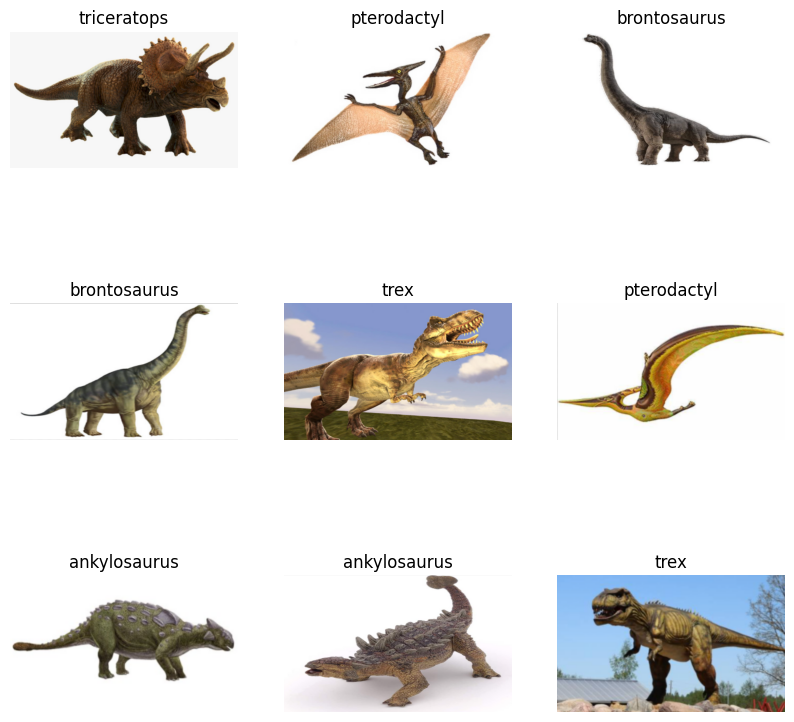

In [23]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [30]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(300, 500, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 300, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 300, 500, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 150, 250, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 150, 250, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 75, 125, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 75, 125, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 37, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 146816)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    18,792,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,816,805 (71.78 MB)

 Trainable params: 18,816,805 (71.78 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 625ms/step - accuracy: 0.1648 - loss: 9.8988 - val_accuracy: 0.2250 - val_loss: 5.3888
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 599ms/step - accuracy: 0.2737 - loss: 3.6438 - val_accuracy: 0.1250 - val_loss: 1.6426
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 613ms/step - accuracy: 0.4718 - loss: 1.3098 - val_accuracy: 0.8000 - val_loss: 0.9224
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 608ms/step - accuracy: 0.7817 - loss: 0.8164 - val_accuracy: 0.4250 - val_loss: 0.9907
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 593ms/step - accuracy: 0.8355 - loss: 0.3883 - val_accuracy: 0.6250 - val_loss: 0.9141
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 611ms/step - accuracy: 0.9105 - loss: 0.2554 - val_accuracy: 0.8500 - val_loss: 0.5215
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 591ms/step - accuracy: 0.9694 - loss: 0.1214 - val_accuracy: 0.7750 - val_loss: 0.4200
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 581ms/step - accuracy: 0.9923 - loss: 0.0671 - val_accuracy: 0.8750 - val_loss:

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [36]:
acc

[0.16249999403953552,
 0.26249998807907104,
 0.625,
 0.8125,
 0.875,
 0.9125000238418579,
 0.956250011920929,
 0.9937499761581421,
 0.9937499761581421,
 0.9937499761581421,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [37]:
val_acc 

[0.22499999403953552,
 0.125,
 0.800000011920929,
 0.42500001192092896,
 0.625,
 0.8500000238418579,
 0.7749999761581421,
 0.875,
 0.675000011920929,
 0.824999988079071,
 0.8500000238418579,
 0.824999988079071,
 0.800000011920929,
 0.800000011920929,
 0.800000011920929]

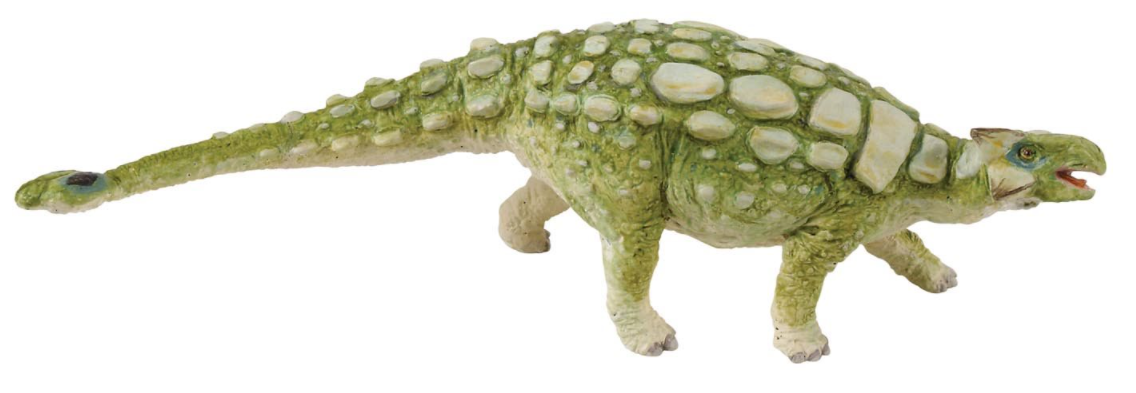

In [8]:
tf.keras.preprocessing.image.load_img('data/ankylosaurus/1.png')

In [8]:
tf?

In [7]:
df = pd.read_csv('data/dinosaur.csv')
df

,Name,Period,Diet,Country
0,Aardonyx,Jurassic,herbivore,South Africa
1,Abelisaurus,Cretaceous,carnivore,South America
2,Abrictosaurus,Jurassic,herbivore,South Africa
3,Abrosaurus,Jurassic,herbivore,China
4,Abydosaurus,Cretaceous,herbivore,North America
...,...,...,...,...
1149,Zizhongosaurus,Jurassic,herbivore,China
1150,Zuniceratops,Cretaceous,herbivore,North America
1151,Zuolong,Jurassic,carnivore,China
1152,Zupaysaurus,Triassic,carnivore,South America
